# Problem Description
Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have given a problem to identify the customers segments, those are eligible for loan amount so that they can specifically target these customers. Here they have provided a partial data set.<br>
Dataset Link:- https://www.kaggle.com/datasets/altruistdelhite04/loan-prediction-problem-dataset?select=train_u6lujuX_CVtuZ9i.csv

In [35]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [36]:
train = pd.read_csv("train.csv")

In [37]:
train

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [38]:
test = pd.read_csv("test.csv")
test

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban
363,LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban
364,LP002980,Male,No,0,Graduate,No,3250,1993,126.0,360.0,NaN,Semiurban
365,LP002986,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural


# EDA & Data-Preprocessing

In [39]:
print(train.columns.values)
print(test.columns.values)

['Loan_ID' 'Gender' 'Married' 'Dependents' 'Education' 'Self_Employed'
 'ApplicantIncome' 'CoapplicantIncome' 'LoanAmount' 'Loan_Amount_Term'
 'Credit_History' 'Property_Area' 'Loan_Status']
['Loan_ID' 'Gender' 'Married' 'Dependents' 'Education' 'Self_Employed'
 'ApplicantIncome' 'CoapplicantIncome' 'LoanAmount' 'Loan_Amount_Term'
 'Credit_History' 'Property_Area']


In [40]:
train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [41]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


<Figure size 720x432 with 0 Axes>

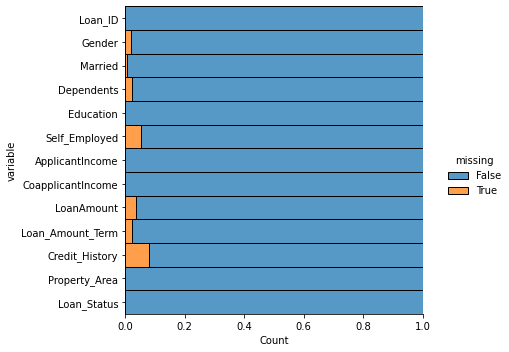

In [42]:
# Let's visualize the missing data 

import seaborn as sns

plt.figure(figsize=(10,6))
sns.displot(
    data=train.isna().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    aspect=1.25)

plt.show()

C:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Married', ylabel='count'>

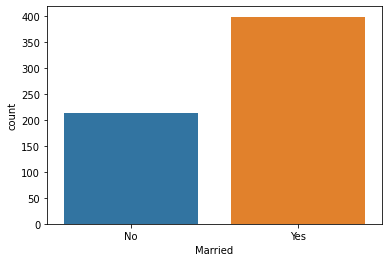

In [43]:
# Plotting No. of Married people vs Unmarried people¶
sns.countplot(train.Married)

In [44]:
# Approval of loans between Married and Unmarried people
pd.crosstab(train.Married , train.Loan_Status,margins = True)

Loan_Status,N,Y,All
Married,,,
No,79,134,213
Yes,113,285,398
All,192,419,611


C:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='LoanAmount', ylabel='Density'>

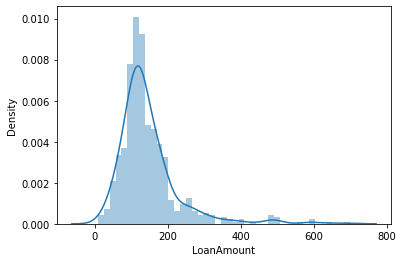

In [45]:
sns.distplot(train['LoanAmount'])

C:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Property_Area', ylabel='count'>

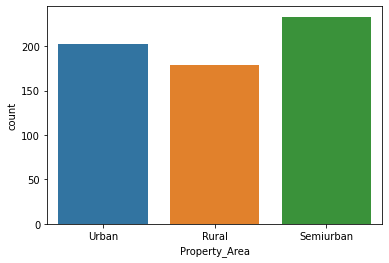

In [46]:
sns.countplot(train.Property_Area)

In [47]:
# Relation between Credit History and Loan status.
train.Credit_History.value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

<AxesSubplot:xlabel='Credit_History'>

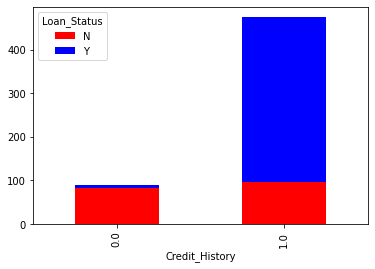

In [48]:
lc = pd.crosstab(train['Credit_History'], train['Loan_Status'])
lc.plot(kind='bar', stacked=True, color=['red','blue'], grid=False)

- The credit history vs Loan Status indicates:
- The good credit history applicants have more chances of getting Loan.
- With better credit History the Loan amount given was greater too.
- But many were not given loan in the range 0-100
- The applicant with poor credit history were handled in the range 0-100 only.

In [49]:
# This is completely biased dataset because one type of values are double of other.
train["Loan_Status"].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [50]:
# Unique Values in each column
train.nunique()

Loan_ID              614
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           203
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

# Data Cleaning

In [51]:
train = train.drop('Loan_ID', axis=1)

In [52]:
train['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

# Filling nan values

In [53]:
train['Gender'] = train['Gender'].fillna(train['Gender'].mode()[0])
train['Married'] = train['Married'].fillna(train['Married'].mode()[0])
train['Dependents'] = train['Dependents'].fillna(train['Dependents'].mode()[0])
train['Self_Employed'] = train['Self_Employed'].fillna(train['Self_Employed'].mode()[0])
train['LoanAmount'] = train['LoanAmount'].fillna(train['LoanAmount'].mean())
train['Loan_Amount_Term'] = train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mean())
train['Credit_History'] = train['Credit_History'].fillna(train['Credit_History'].mode()[0])

In [54]:
train

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.000000,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,0.0,40.000000,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.000000,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.000000,360.0,1.0,Urban,Y


In [55]:
train.info() #now all values are filled

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    object 
 1   Married            614 non-null    object 
 2   Dependents         614 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      614 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


# Label Encoding

In [56]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
train['Loan_Status'] = label.fit_transform(train['Loan_Status'])

In [57]:
train

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,1
1,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,0
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,1
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,1
4,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.000000,360.0,1.0,Rural,1
610,Male,Yes,3+,Graduate,No,4106,0.0,40.000000,180.0,1.0,Rural,1
611,Male,Yes,1,Graduate,No,8072,240.0,253.000000,360.0,1.0,Urban,1
612,Male,Yes,2,Graduate,No,7583,0.0,187.000000,360.0,1.0,Urban,1


In [58]:
for i in train.columns:
    print(i)
    if len(train[i].unique())<5:        
        train[i] = label.fit_transform(train[i])    

Gender
Married
Dependents
Education
Self_Employed
ApplicantIncome
CoapplicantIncome
LoanAmount
Loan_Amount_Term
Credit_History
Property_Area
Loan_Status


In [59]:
train

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,146.412162,360.0,1,2,1
1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1,0,0
2,1,1,0,0,1,3000,0.0,66.000000,360.0,1,2,1
3,1,1,0,1,0,2583,2358.0,120.000000,360.0,1,2,1
4,1,0,0,0,0,6000,0.0,141.000000,360.0,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,2900,0.0,71.000000,360.0,1,0,1
610,1,1,3,0,0,4106,0.0,40.000000,180.0,1,0,1
611,1,1,1,0,0,8072,240.0,253.000000,360.0,1,2,1
612,1,1,2,0,0,7583,0.0,187.000000,360.0,1,2,1


# Making dependent and independent part

In [60]:
X = train.drop("Loan_Status", axis=1)
y = train['Loan_Status']

In [61]:
print(X.shape)
print(y.shape)

(614, 11)
(614,)


# Imbalanced dataset handling

## `1. Under Sampling`

In [62]:
from imblearn.under_sampling import NearMiss

In [63]:
nm = NearMiss()
X_res, y_res = nm.fit_resample(X,y)

In [64]:
X_res.shape, y_res.shape

((384, 11), (384,))

In [65]:
y_res.value_counts()  #now we can see here equal dataset is taken

0    192
1    192
Name: Loan_Status, dtype: int64

# Train Test division

In [66]:
from sklearn.model_selection import train_test_split

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.3)
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [68]:
y_train.shape

(268,)

In [69]:
from sklearn.tree import DecisionTreeClassifier

In [70]:
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [71]:
pred = tree.predict(X_test)

In [72]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, pred)

0.6810344827586207

In [73]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, pred)

array([[37, 29],
       [ 8, 42]], dtype=int64)

In [74]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.82      0.56      0.67        66
           1       0.59      0.84      0.69        50

    accuracy                           0.68       116
   macro avg       0.71      0.70      0.68       116
weighted avg       0.72      0.68      0.68       116



[Text(0.37008101851851855, 0.9615384615384616, 'X[9] <= 0.5\ngini = 0.498\nsamples = 268\nvalue = [126, 142]'),
 Text(0.11342592592592593, 0.8846153846153846, 'X[1] <= 0.5\ngini = 0.065\nsamples = 59\nvalue = [57, 2]'),
 Text(0.09490740740740741, 0.8076923076923077, 'X[7] <= 128.0\ngini = 0.18\nsamples = 20\nvalue = [18, 2]'),
 Text(0.0763888888888889, 0.7307692307692307, 'gini = 0.0\nsamples = 13\nvalue = [13, 0]'),
 Text(0.11342592592592593, 0.7307692307692307, 'X[5] <= 5170.0\ngini = 0.408\nsamples = 7\nvalue = [5, 2]'),
 Text(0.09490740740740741, 0.6538461538461539, 'X[5] <= 4608.5\ngini = 0.444\nsamples = 3\nvalue = [1, 2]'),
 Text(0.0763888888888889, 0.5769230769230769, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.11342592592592593, 0.5769230769230769, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.13194444444444445, 0.6538461538461539, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]'),
 Text(0.13194444444444445, 0.8076923076923077, 'gini = 0.0\nsamples = 39\nvalue = [39, 0]

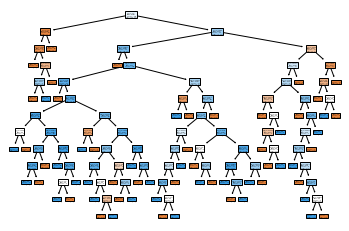

In [75]:
from sklearn import tree as t
t.plot_tree(tree, filled=True)

## `2. Over Sampling`

In [76]:
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import NearMiss

In [77]:
# Implementing Oversampling for Handling Imbalanced 
smk = SMOTETomek(random_state=42)
X_res,y_res=smk.fit_resample(X,y)

In [78]:
X_res.shape, y_res.shape

((716, 11), (716,))

In [79]:
y_res.value_counts()  #now we can see here equal dataset is taken

1    358
0    358
Name: Loan_Status, dtype: int64

# Train Test division

In [80]:
from sklearn.model_selection import train_test_split

In [81]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.3)
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [82]:
y_train.shape

(501,)

In [83]:
from sklearn.tree import DecisionTreeClassifier

In [84]:
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [85]:
pred = tree.predict(X_test)

In [86]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, pred)

0.8046511627906977

In [87]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, pred)

array([[95, 20],
       [22, 78]], dtype=int64)

In [88]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.81      0.83      0.82       115
           1       0.80      0.78      0.79       100

    accuracy                           0.80       215
   macro avg       0.80      0.80      0.80       215
weighted avg       0.80      0.80      0.80       215



[Text(0.26120923913043476, 0.9666666666666667, 'X[9] <= 0.5\ngini = 0.5\nsamples = 501\nvalue = [243, 258]'),
 Text(0.06521739130434782, 0.9, 'X[7] <= 523.113\ngini = 0.039\nsamples = 150\nvalue = [147, 3]'),
 Text(0.05434782608695652, 0.8333333333333334, 'X[6] <= 8115.0\ngini = 0.026\nsamples = 149\nvalue = [147, 2]'),
 Text(0.03260869565217391, 0.7666666666666667, 'X[8] <= 180.467\ngini = 0.014\nsamples = 146\nvalue = [145, 1]'),
 Text(0.021739130434782608, 0.7, 'X[5] <= 2568.0\ngini = 0.198\nsamples = 9\nvalue = [8, 1]'),
 Text(0.010869565217391304, 0.6333333333333333, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.03260869565217391, 0.6333333333333333, 'gini = 0.0\nsamples = 8\nvalue = [8, 0]'),
 Text(0.043478260869565216, 0.7, 'gini = 0.0\nsamples = 137\nvalue = [137, 0]'),
 Text(0.07608695652173914, 0.7666666666666667, 'X[7] <= 218.352\ngini = 0.444\nsamples = 3\nvalue = [2, 1]'),
 Text(0.06521739130434782, 0.7, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.08695652173

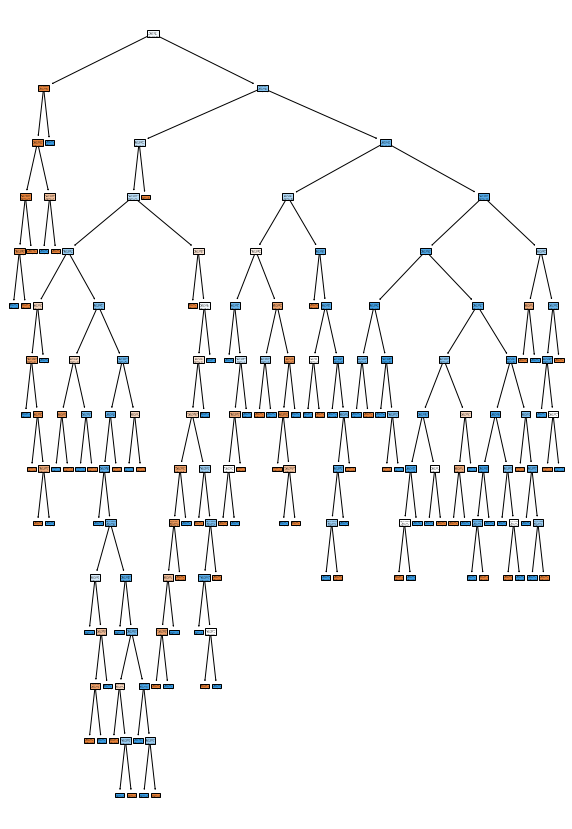

In [89]:
from sklearn import tree as t
import matplotlib.pyplot as plt
plt.figure(figsize=(10,15))
t.plot_tree(tree, filled=True)

## `3. Over Sampling `
### RandomOverSampler to handle imbalanced data

In [90]:
from imblearn.over_sampling import RandomOverSampler

In [91]:
# Implementing Oversampling for Handling Imbalanced 
os = RandomOverSampler()
X_res,y_res=os.fit_resample(X,y)

In [92]:
X_res.shape, y_res.shape

((844, 11), (844,))

In [93]:
y_res.value_counts()  #now we can see here equal dataset is taken

1    422
0    422
Name: Loan_Status, dtype: int64

# Train Test division

In [94]:
from sklearn.model_selection import train_test_split

In [95]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.3)
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [96]:
y_train.shape

(590,)

In [97]:
from sklearn.tree import DecisionTreeClassifier

In [98]:
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [99]:
pred = tree.predict(X_test)

In [100]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, pred)

0.8385826771653543

In [101]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, pred)

array([[111,  17],
       [ 24, 102]], dtype=int64)

In [102]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.82      0.87      0.84       128
           1       0.86      0.81      0.83       126

    accuracy                           0.84       254
   macro avg       0.84      0.84      0.84       254
weighted avg       0.84      0.84      0.84       254



[Text(0.2657127808988764, 0.96875, 'X[9] <= 0.5\ngini = 0.5\nsamples = 590\nvalue = [294, 296]'),
 Text(0.11938202247191011, 0.90625, 'X[5] <= 4249.5\ngini = 0.058\nsamples = 135\nvalue = [131, 4]'),
 Text(0.09691011235955056, 0.84375, 'X[8] <= 240.0\ngini = 0.023\nsamples = 86\nvalue = [85, 1]'),
 Text(0.08567415730337079, 0.78125, 'X[5] <= 2546.0\ngini = 0.142\nsamples = 13\nvalue = [12, 1]'),
 Text(0.07443820224719101, 0.71875, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.09691011235955056, 0.71875, 'gini = 0.0\nsamples = 12\nvalue = [12, 0]'),
 Text(0.10814606741573034, 0.78125, 'gini = 0.0\nsamples = 73\nvalue = [73, 0]'),
 Text(0.14185393258426968, 0.84375, 'X[5] <= 4934.0\ngini = 0.115\nsamples = 49\nvalue = [46, 3]'),
 Text(0.1306179775280899, 0.78125, 'X[5] <= 4836.0\ngini = 0.469\nsamples = 8\nvalue = [5, 3]'),
 Text(0.11938202247191011, 0.71875, 'X[5] <= 4366.5\ngini = 0.278\nsamples = 6\nvalue = [5, 1]'),
 Text(0.10814606741573034, 0.65625, 'gini = 0.0\nsamples = 1\n

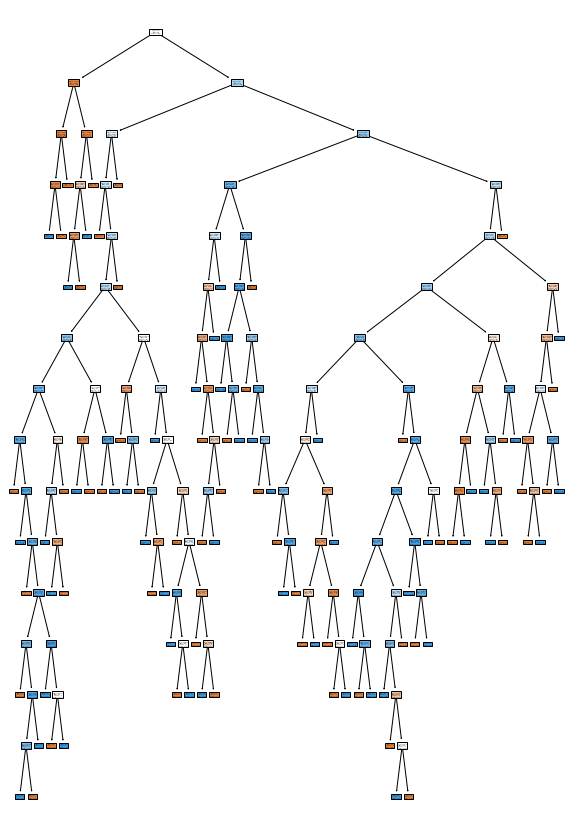

In [103]:
from sklearn import tree as t
import matplotlib.pyplot as plt
plt.figure(figsize=(10,15))
t.plot_tree(tree, filled=True)

In [104]:
# So our accuracy has increased from this 3 types of over and under sampling

In [105]:
# Now we will use some different models over our dataset

# KNN

In [106]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
pred = knn.predict(X_test)

In [107]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, pred)

0.562992125984252

In [108]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, pred)

array([[74, 54],
       [57, 69]], dtype=int64)

In [109]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.56      0.58      0.57       128
           1       0.56      0.55      0.55       126

    accuracy                           0.56       254
   macro avg       0.56      0.56      0.56       254
weighted avg       0.56      0.56      0.56       254



[Text(0.2657127808988764, 0.96875, 'X[9] <= 0.5\ngini = 0.5\nsamples = 590\nvalue = [294, 296]'),
 Text(0.11938202247191011, 0.90625, 'X[5] <= 4249.5\ngini = 0.058\nsamples = 135\nvalue = [131, 4]'),
 Text(0.09691011235955056, 0.84375, 'X[8] <= 240.0\ngini = 0.023\nsamples = 86\nvalue = [85, 1]'),
 Text(0.08567415730337079, 0.78125, 'X[5] <= 2546.0\ngini = 0.142\nsamples = 13\nvalue = [12, 1]'),
 Text(0.07443820224719101, 0.71875, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.09691011235955056, 0.71875, 'gini = 0.0\nsamples = 12\nvalue = [12, 0]'),
 Text(0.10814606741573034, 0.78125, 'gini = 0.0\nsamples = 73\nvalue = [73, 0]'),
 Text(0.14185393258426968, 0.84375, 'X[5] <= 4934.0\ngini = 0.115\nsamples = 49\nvalue = [46, 3]'),
 Text(0.1306179775280899, 0.78125, 'X[5] <= 4836.0\ngini = 0.469\nsamples = 8\nvalue = [5, 3]'),
 Text(0.11938202247191011, 0.71875, 'X[5] <= 4366.5\ngini = 0.278\nsamples = 6\nvalue = [5, 1]'),
 Text(0.10814606741573034, 0.65625, 'gini = 0.0\nsamples = 1\n

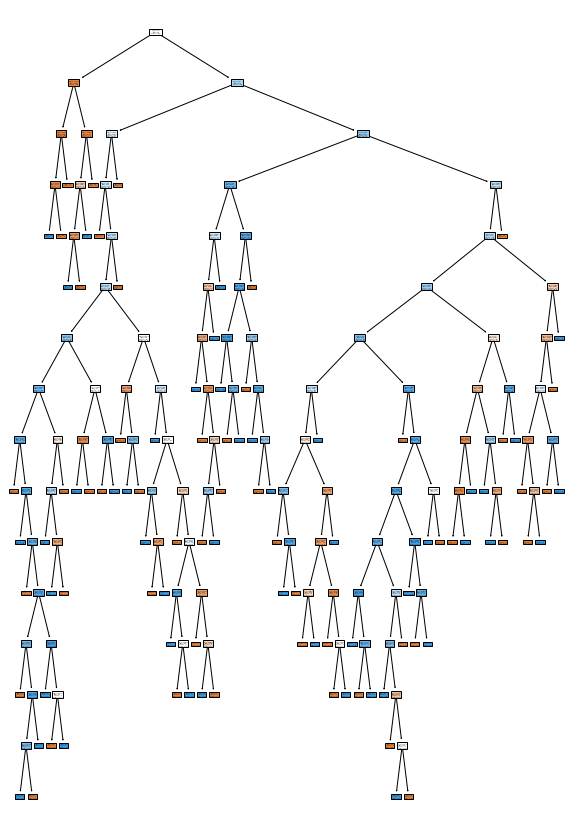

In [110]:
from sklearn import tree as t
import matplotlib.pyplot as plt
plt.figure(figsize=(10,15))
t.plot_tree(tree, filled=True)

In [111]:
lst = []
for i in range(1,20):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred = knn.predict(X_test)    
    acc = accuracy_score(y_test, pred)
    lst.append(acc)

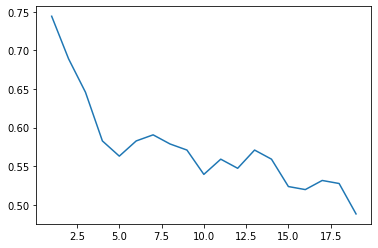

In [112]:
plt.plot(range(1,20), lst)

In [113]:
# from here 1 or 2 is good to consider

In [114]:
error_rate = []

# Will take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

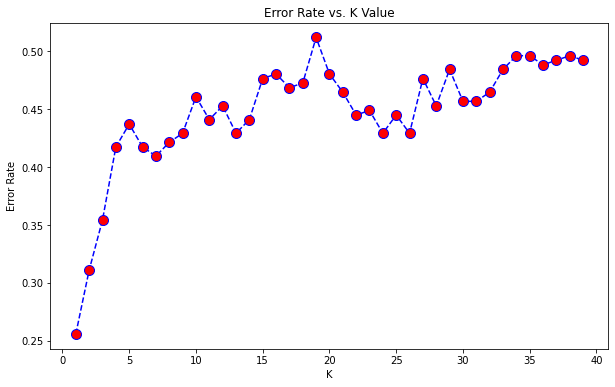

In [115]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

# xgboost

In [124]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
pred = xgb.predict(X_test)

In [125]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, pred)

0.8503937007874016

In [126]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, pred)

0.8503937007874016

In [127]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, pred)

array([[110,  18],
       [ 20, 106]], dtype=int64)

In [128]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.85      0.86      0.85       128
           1       0.85      0.84      0.85       126

    accuracy                           0.85       254
   macro avg       0.85      0.85      0.85       254
weighted avg       0.85      0.85      0.85       254



[Text(0.2657127808988764, 0.96875, 'X[9] <= 0.5\ngini = 0.5\nsamples = 590\nvalue = [294, 296]'),
 Text(0.11938202247191011, 0.90625, 'X[5] <= 4249.5\ngini = 0.058\nsamples = 135\nvalue = [131, 4]'),
 Text(0.09691011235955056, 0.84375, 'X[8] <= 240.0\ngini = 0.023\nsamples = 86\nvalue = [85, 1]'),
 Text(0.08567415730337079, 0.78125, 'X[5] <= 2546.0\ngini = 0.142\nsamples = 13\nvalue = [12, 1]'),
 Text(0.07443820224719101, 0.71875, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.09691011235955056, 0.71875, 'gini = 0.0\nsamples = 12\nvalue = [12, 0]'),
 Text(0.10814606741573034, 0.78125, 'gini = 0.0\nsamples = 73\nvalue = [73, 0]'),
 Text(0.14185393258426968, 0.84375, 'X[5] <= 4934.0\ngini = 0.115\nsamples = 49\nvalue = [46, 3]'),
 Text(0.1306179775280899, 0.78125, 'X[5] <= 4836.0\ngini = 0.469\nsamples = 8\nvalue = [5, 3]'),
 Text(0.11938202247191011, 0.71875, 'X[5] <= 4366.5\ngini = 0.278\nsamples = 6\nvalue = [5, 1]'),
 Text(0.10814606741573034, 0.65625, 'gini = 0.0\nsamples = 1\n

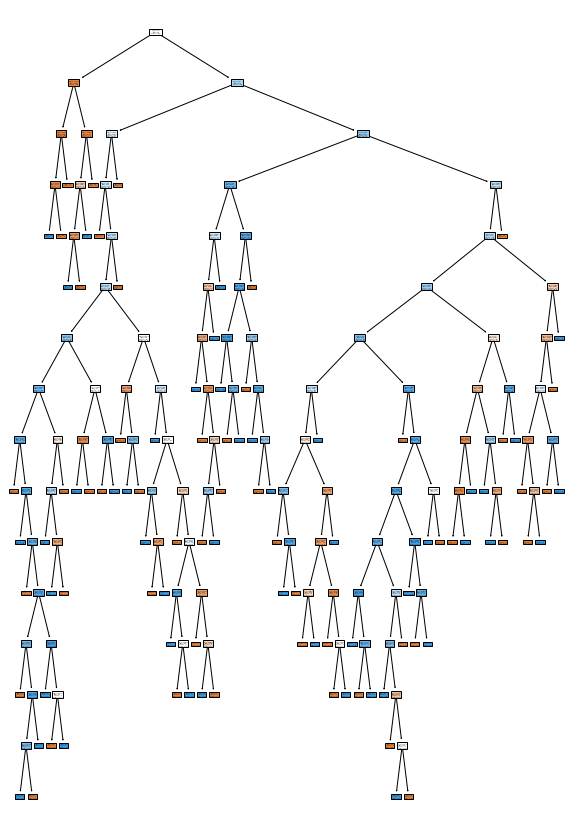

In [129]:
from sklearn import tree as t
import matplotlib.pyplot as plt
plt.figure(figsize=(10,15))
t.plot_tree(tree, filled=True)

# SVM

In [130]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train, y_train)
pred = svc.predict(X_test)

In [131]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, pred)

0.48031496062992124

In [132]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, pred)

array([[62, 66],
       [66, 60]], dtype=int64)

In [133]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.48      0.48      0.48       128
           1       0.48      0.48      0.48       126

    accuracy                           0.48       254
   macro avg       0.48      0.48      0.48       254
weighted avg       0.48      0.48      0.48       254



[Text(0.2657127808988764, 0.96875, 'X[9] <= 0.5\ngini = 0.5\nsamples = 590\nvalue = [294, 296]'),
 Text(0.11938202247191011, 0.90625, 'X[5] <= 4249.5\ngini = 0.058\nsamples = 135\nvalue = [131, 4]'),
 Text(0.09691011235955056, 0.84375, 'X[8] <= 240.0\ngini = 0.023\nsamples = 86\nvalue = [85, 1]'),
 Text(0.08567415730337079, 0.78125, 'X[5] <= 2546.0\ngini = 0.142\nsamples = 13\nvalue = [12, 1]'),
 Text(0.07443820224719101, 0.71875, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.09691011235955056, 0.71875, 'gini = 0.0\nsamples = 12\nvalue = [12, 0]'),
 Text(0.10814606741573034, 0.78125, 'gini = 0.0\nsamples = 73\nvalue = [73, 0]'),
 Text(0.14185393258426968, 0.84375, 'X[5] <= 4934.0\ngini = 0.115\nsamples = 49\nvalue = [46, 3]'),
 Text(0.1306179775280899, 0.78125, 'X[5] <= 4836.0\ngini = 0.469\nsamples = 8\nvalue = [5, 3]'),
 Text(0.11938202247191011, 0.71875, 'X[5] <= 4366.5\ngini = 0.278\nsamples = 6\nvalue = [5, 1]'),
 Text(0.10814606741573034, 0.65625, 'gini = 0.0\nsamples = 1\n

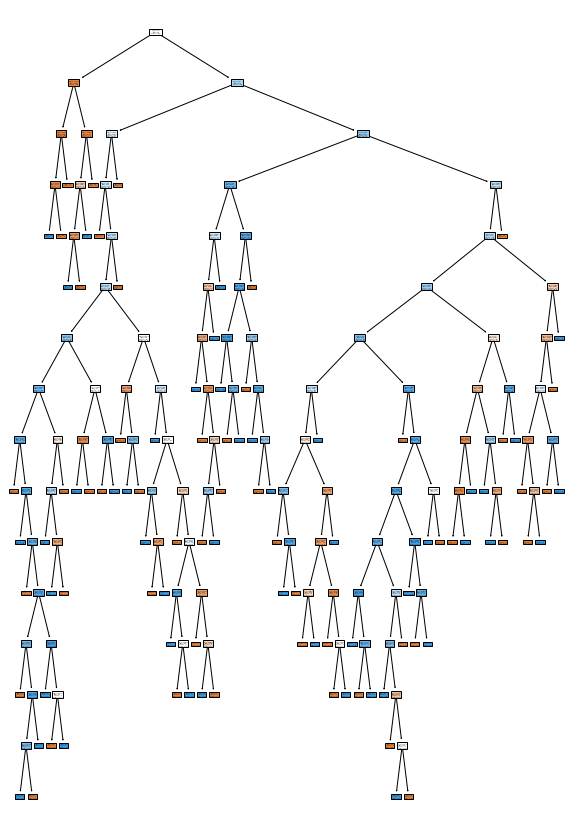

In [134]:
from sklearn import tree as t
import matplotlib.pyplot as plt
plt.figure(figsize=(10,15))
t.plot_tree(tree, filled=True)

# LogisticRegression

In [135]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)
pred  = lr.predict(X_test)

In [136]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, pred)

0.7401574803149606

In [137]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, pred)

array([[ 81,  47],
       [ 19, 107]], dtype=int64)

In [138]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.81      0.63      0.71       128
           1       0.69      0.85      0.76       126

    accuracy                           0.74       254
   macro avg       0.75      0.74      0.74       254
weighted avg       0.75      0.74      0.74       254



[Text(0.2657127808988764, 0.96875, 'X[9] <= 0.5\ngini = 0.5\nsamples = 590\nvalue = [294, 296]'),
 Text(0.11938202247191011, 0.90625, 'X[5] <= 4249.5\ngini = 0.058\nsamples = 135\nvalue = [131, 4]'),
 Text(0.09691011235955056, 0.84375, 'X[8] <= 240.0\ngini = 0.023\nsamples = 86\nvalue = [85, 1]'),
 Text(0.08567415730337079, 0.78125, 'X[5] <= 2546.0\ngini = 0.142\nsamples = 13\nvalue = [12, 1]'),
 Text(0.07443820224719101, 0.71875, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.09691011235955056, 0.71875, 'gini = 0.0\nsamples = 12\nvalue = [12, 0]'),
 Text(0.10814606741573034, 0.78125, 'gini = 0.0\nsamples = 73\nvalue = [73, 0]'),
 Text(0.14185393258426968, 0.84375, 'X[5] <= 4934.0\ngini = 0.115\nsamples = 49\nvalue = [46, 3]'),
 Text(0.1306179775280899, 0.78125, 'X[5] <= 4836.0\ngini = 0.469\nsamples = 8\nvalue = [5, 3]'),
 Text(0.11938202247191011, 0.71875, 'X[5] <= 4366.5\ngini = 0.278\nsamples = 6\nvalue = [5, 1]'),
 Text(0.10814606741573034, 0.65625, 'gini = 0.0\nsamples = 1\n

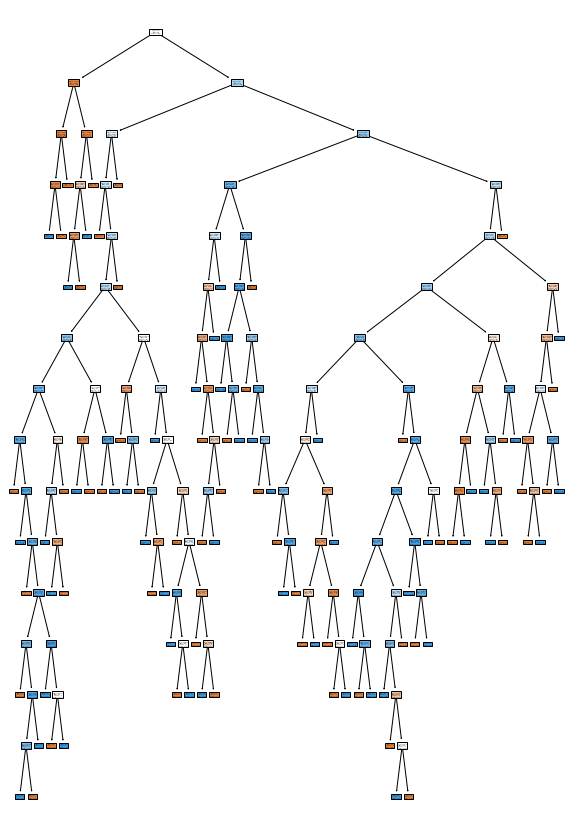

In [139]:
from sklearn import tree as t
import matplotlib.pyplot as plt
plt.figure(figsize=(10,15))
t.plot_tree(tree, filled=True)

# Naive Bayes

In [140]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, y_train)
pred = nb.predict(X_test)

In [141]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, pred)

0.7047244094488189

In [142]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, pred)

array([[ 67,  61],
       [ 14, 112]], dtype=int64)

In [143]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.83      0.52      0.64       128
           1       0.65      0.89      0.75       126

    accuracy                           0.70       254
   macro avg       0.74      0.71      0.70       254
weighted avg       0.74      0.70      0.69       254



[Text(0.2657127808988764, 0.96875, 'X[9] <= 0.5\ngini = 0.5\nsamples = 590\nvalue = [294, 296]'),
 Text(0.11938202247191011, 0.90625, 'X[5] <= 4249.5\ngini = 0.058\nsamples = 135\nvalue = [131, 4]'),
 Text(0.09691011235955056, 0.84375, 'X[8] <= 240.0\ngini = 0.023\nsamples = 86\nvalue = [85, 1]'),
 Text(0.08567415730337079, 0.78125, 'X[5] <= 2546.0\ngini = 0.142\nsamples = 13\nvalue = [12, 1]'),
 Text(0.07443820224719101, 0.71875, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.09691011235955056, 0.71875, 'gini = 0.0\nsamples = 12\nvalue = [12, 0]'),
 Text(0.10814606741573034, 0.78125, 'gini = 0.0\nsamples = 73\nvalue = [73, 0]'),
 Text(0.14185393258426968, 0.84375, 'X[5] <= 4934.0\ngini = 0.115\nsamples = 49\nvalue = [46, 3]'),
 Text(0.1306179775280899, 0.78125, 'X[5] <= 4836.0\ngini = 0.469\nsamples = 8\nvalue = [5, 3]'),
 Text(0.11938202247191011, 0.71875, 'X[5] <= 4366.5\ngini = 0.278\nsamples = 6\nvalue = [5, 1]'),
 Text(0.10814606741573034, 0.65625, 'gini = 0.0\nsamples = 1\n

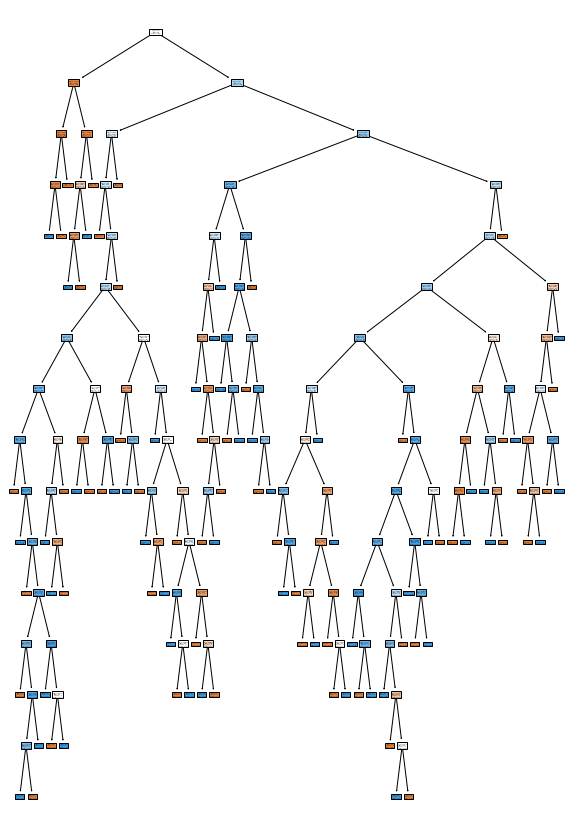

In [144]:
from sklearn import tree as t
import matplotlib.pyplot as plt
plt.figure(figsize=(10,15))
t.plot_tree(tree, filled=True)

# Random Forest

In [145]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
pred = rf.predict(X_test)

In [146]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, pred)

0.84251968503937

In [147]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, pred)

array([[105,  23],
       [ 17, 109]], dtype=int64)

In [148]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.86      0.82      0.84       128
           1       0.83      0.87      0.84       126

    accuracy                           0.84       254
   macro avg       0.84      0.84      0.84       254
weighted avg       0.84      0.84      0.84       254



[Text(0.2657127808988764, 0.96875, 'X[9] <= 0.5\ngini = 0.5\nsamples = 590\nvalue = [294, 296]'),
 Text(0.11938202247191011, 0.90625, 'X[5] <= 4249.5\ngini = 0.058\nsamples = 135\nvalue = [131, 4]'),
 Text(0.09691011235955056, 0.84375, 'X[8] <= 240.0\ngini = 0.023\nsamples = 86\nvalue = [85, 1]'),
 Text(0.08567415730337079, 0.78125, 'X[5] <= 2546.0\ngini = 0.142\nsamples = 13\nvalue = [12, 1]'),
 Text(0.07443820224719101, 0.71875, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.09691011235955056, 0.71875, 'gini = 0.0\nsamples = 12\nvalue = [12, 0]'),
 Text(0.10814606741573034, 0.78125, 'gini = 0.0\nsamples = 73\nvalue = [73, 0]'),
 Text(0.14185393258426968, 0.84375, 'X[5] <= 4934.0\ngini = 0.115\nsamples = 49\nvalue = [46, 3]'),
 Text(0.1306179775280899, 0.78125, 'X[5] <= 4836.0\ngini = 0.469\nsamples = 8\nvalue = [5, 3]'),
 Text(0.11938202247191011, 0.71875, 'X[5] <= 4366.5\ngini = 0.278\nsamples = 6\nvalue = [5, 1]'),
 Text(0.10814606741573034, 0.65625, 'gini = 0.0\nsamples = 1\n

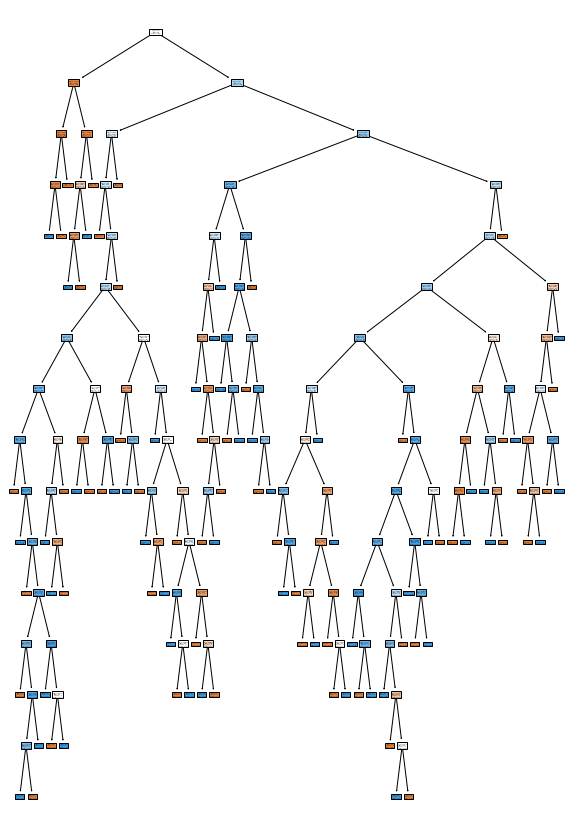

In [149]:
from sklearn import tree as t
import matplotlib.pyplot as plt
plt.figure(figsize=(10,15))
t.plot_tree(tree, filled=True)

# Accuracy Chart

In [ ]:
for i in [tree, knn, xgb, lr, nb , svc, rf ]:
    pred = i.predict(X_test)
    score = accuracy_score(y_test, pred)
    print(i, score)

In [ ]:
# So here XGB and Random forest outperformed

# `Testing Dataset`

In [209]:
test = pd.read_csv("test.csv")

In [210]:
test

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban
363,LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban
364,LP002980,Male,No,0,Graduate,No,3250,1993,126.0,360.0,NaN,Semiurban
365,LP002986,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural


In [211]:
loan_id = test['Loan_ID']

# Data Cleaning

In [212]:
test = test.drop('Loan_ID', axis=1)

# Filling nan values

In [213]:
test['Gender'] = test['Gender'].fillna(test['Gender'].mode()[0])
test['Married'] = test['Married'].fillna(test['Married'].mode()[0])
test['Dependents'] = test['Dependents'].fillna(test['Dependents'].mode()[0])
test['Self_Employed'] = test['Self_Employed'].fillna(test['Self_Employed'].mode()[0])
test['LoanAmount'] = test['LoanAmount'].fillna(test['LoanAmount'].mean())
test['Loan_Amount_Term'] = test['Loan_Amount_Term'].fillna(test['Loan_Amount_Term'].mean())
test['Credit_History'] = test['Credit_History'].fillna(test['Credit_History'].mode()[0])

In [214]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             367 non-null    object 
 1   Married            367 non-null    object 
 2   Dependents         367 non-null    object 
 3   Education          367 non-null    object 
 4   Self_Employed      367 non-null    object 
 5   ApplicantIncome    367 non-null    int64  
 6   CoapplicantIncome  367 non-null    int64  
 7   LoanAmount         367 non-null    float64
 8   Loan_Amount_Term   367 non-null    float64
 9   Credit_History     367 non-null    float64
 10  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(6)
memory usage: 31.7+ KB


# Label Encoding

In [215]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()

In [216]:
for i in test.columns:
    print(i)
    if len(test[i].unique())<5:        
        test[i] = label.fit_transform(test[i])    

Gender
Married
Dependents
Education
Self_Employed
ApplicantIncome
CoapplicantIncome
LoanAmount
Loan_Amount_Term
Credit_History
Property_Area


In [217]:
test

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,1,0,0,0,5720,0,110.0,360.0,1,2
1,1,1,1,0,0,3076,1500,126.0,360.0,1,2
2,1,1,2,0,0,5000,1800,208.0,360.0,1,2
3,1,1,2,0,0,2340,2546,100.0,360.0,1,2
4,1,0,0,1,0,3276,0,78.0,360.0,1,2
...,...,...,...,...,...,...,...,...,...,...,...
362,1,1,3,1,1,4009,1777,113.0,360.0,1,2
363,1,1,0,0,0,4158,709,115.0,360.0,1,2
364,1,0,0,0,0,3250,1993,126.0,360.0,1,1
365,1,1,0,0,0,5000,2393,158.0,360.0,1,0


# Prediction

In [218]:
predict = xgb.predict(test).tolist()

In [219]:
predict = pd.DataFrame(list(zip(loan_id, predict)))
predict

,0,1
0,LP001015,1
1,LP001022,1
2,LP001031,1
3,LP001035,1
4,LP001051,0
...,...,...
362,LP002971,1
363,LP002975,1
364,LP002980,1
365,LP002986,1


In [220]:
predict.to_csv("Prediction.csv", index=False, header=['Loan_ID', 'Prediction'] )

## Conclusion
The Loan status has better relation with features such as Credit History, Applicant's Income, Loan Amount needed by them, Family status(Depenedents) and Property Area which are generally considered by the loan providing organisations. These factors are hence used to take correct decisions to provide loan status or not. This data analysis hence gives a realisation of features and the relation between them from the older decision examples hence giving a learning to predict the class of the unseen data.